In [1]:
from Model import *

In [2]:
params = {"N": 100, "k": 3, "w": np.linspace(0,1,10), "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : False, "pool_rate" : 0.015}

max_steps = 500
iterations = 5

results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=iterations,max_steps=max_steps)

results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Majority', 'w', 'iteration']
results_df = results_df.drop(columns = [col for col in results_df.columns if col not in admired_cols])


nested_data = []
for w in params["w"]:
    data = []
    results_w = results_df[results_df.w == w]
    for it in range(iterations):
        results_it = results_w[(results_w.iteration == it) & (results_w.Majority >= 0.9)]
        if len(results_it) > 0:
            consensus_time = results_it.Step.values[0]
            data.append(consensus_time)
        else:
            consensus_time = max_steps
        data.append(consensus_time)

    nested_data.append(np.mean(np.array(data), axis = 0))
        
plt.plot(params["w"], nested_data, color = 'black', label = "Updating only")
plt.axhline(y = 130, color = '0.8', linestyle = 'dashed', label = "Updating and pooling")
plt.xlim([0.2,1])
plt.ylim([-50,300])
plt.legend(loc = 4)
plt.xlabel("SProdOp parameter $w$")
plt.ylabel("Time to consenus")

# plt.savefig("Figures/Varied_av_op_plots/.pdf")

  4%|███▎                                                                               | 2/50 [00:05<02:17,  2.87s/it]


KeyboardInterrupt: 

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]


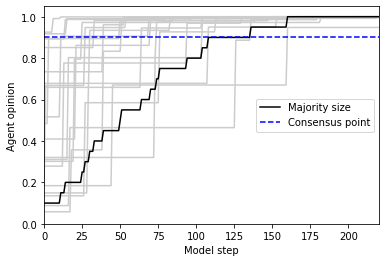

In [23]:
# This plot can be the explanatory plot. We can have the agent opinions plotted as light gray lines and the consensus line as a black line
# that is labelled with M >= ...

params = {"K": 20, "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=1,max_steps=300)
results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Opinion']

plt.figure()
for agentID in range(params["K"]):
    agent = results_df[results_df.AgentID == agentID]
    plt.plot(agent.Step, agent.Opinion, '0.8')
    
plt.plot(results_df.Step, results_df.Consensus, color = 'black', label = 'Majority size')
plt.xlabel("Model step")
plt.ylabel("Agent opinion")
plt.axhline(y = 0.9, color = 'b', linestyle = 'dashed', label = 'Consensus point')
plt.legend(loc = 5)
plt.ylim(0,1.05)
plt.xlim(0, 220)

# plt.savefig("Figures/demonstration_without_pooling.pdf")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.59it/s]


Text(0, 0.5, 'Average opinion')

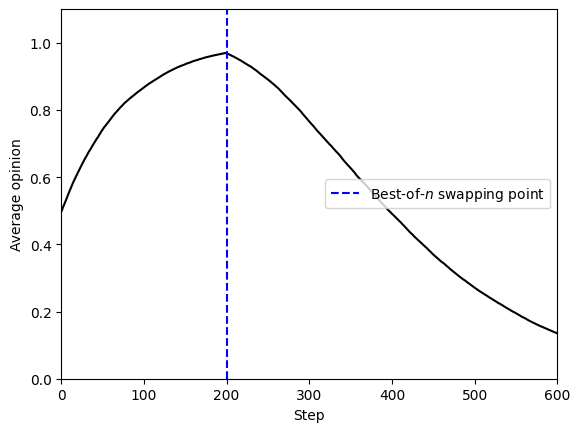

In [3]:
# Plotting average opinion of agents against time step, emulating the simulation run in Figure 2 on Chanelle's opinion pooling
# paper using the same parameters
params = {"K": 100, "n": 3, "w": 0.5, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False, "dynamics" : "switching"}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=100,max_steps=600)
results_df = pd.DataFrame(results)

plt.figure()
data = []
for it in range(100):
    results_it = results_df[results_df.iteration == it]
#     results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#     results_it.drop_duplicates()
    data.append(results_it.Average_opinion)
    
plt.plot(results_it.Step, np.mean(np.array(data), axis=0), color = 'black')
# plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02, its = 30")
# plt.axhline(y = 0.9, color = 'gray', linestyle = 'dashed', label = 'H1 Consensus point')
# plt.axhline(y = 0.1, color = 'green', linestyle = 'dashed', label = 'H2 Consensus point')
plt.axvline(x = 200, color = 'blue', linestyle = 'dashed', label = 'Best-of-$n$ swapping point')
plt.legend(loc = 5)
plt.xlim(0,600)
plt.ylim(0,1.1)
plt.xlabel("Step")
plt.ylabel("Average opinion")
# plt.savefig("Figures/switching_without_pooling2.pdf")

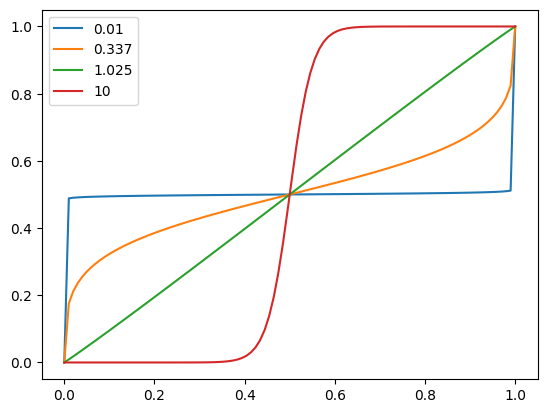

In [27]:
# Recreating figure 3 from opinion pooling paper to make sure that the pooling mechanism is implemented properly.

for w in (0.01, 0.337, 1.025, 10):
    data = []
    for x in np.linspace(0,1,100):
        c_x = x**w / (x**w + (1-x)**w)
        data.append(c_x)
    plt.plot(np.linspace(0,1,100),data, label = w)
    plt.legend()
    
# plt.savefig('Figures/SProdOP_varying_w.pdf')

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.52it/s]


(0.0, 1.1)

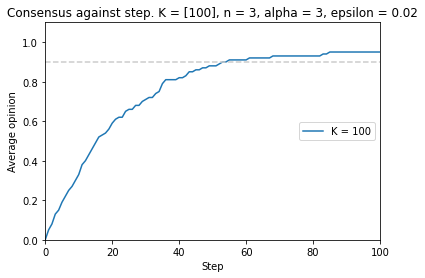

In [7]:
params = {"K": [100], "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : True}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=10,max_steps=100)
results_df = pd.DataFrame(results)

plt.figure()
admired_cols = ['Step', 'Consensus']

for k in params["K"]:
    results_k = results_df[results_df.K == k]
    data = []
    for it in range(1):
        results_it = results_k[results_k.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#         results_it.drop_duplicates()
        data.append(results_it.Consensus)

    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "K = " + str(k))
    plt.legend(loc = 5)
    
plt.title("Consensus against step. K = "+str(params["K"])+", n = "+str(params["n"])+", alpha = "+str(params["n"])+", epsilon = "+str(params["epsilon"]))
plt.xlabel("Step")
plt.axhline(y = 0.9, color = '0.8', linestyle = 'dashed')
plt.ylabel("Average opinion")
plt.xlim([0,100])
plt.ylim([0,1.1])

# plt.savefig('Figures/average_opinion_varying_K_uniform.pdf')

# Heatmap generation

In [2]:
# w_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# theta_range = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10]

inv_range = [0,0.001,0.002,0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
# w_range = [1,1.5,2,2.5,3,3.5,4]
# s_range = [0, 0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.20]

k_range = [2,3,4,5,6,7,8,9,10]
# theta_range = [0,0.004,0.008,0.012,0.016,0.02,0.024,0.028,0.032,0.036,0.040]

# N_range = [50,100,200]
# k_range = [0]

# N_range = [50, 100, 200]
# w_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# w_range = [1,2,3,4,5,6,7,8,9,10]

lengthx = len(k_range)
# associated with first, encompassing for loop

lengthy = len(inv_range)

# stub_w_range = [5]

iterations = 10
max_steps = 1000

desired_cols = ['iteration', 'Step', 'k', 'w', 'Average_opinion', 'Option 0 quality',
               'Option 1 quality', 'Opinion', 'Majority', 'Dynamic_Majority']


metrics_df = pd.DataFrame(columns = ['N', 'k', 'Time to Consensus'])

data_mat = np.empty(shape = (lengthx, lengthy) )
std_mat = np.empty(shape = (lengthx, lengthy) )
fail_mat = np.empty(shape = (lengthx, lengthy) )

data1_mat = np.empty(shape = (lengthx, lengthy) )
std1_mat = np.empty(shape = (lengthx, lengthy) )
fail1_mat = np.empty(shape = (lengthx, lengthy) )

total_mat = np.empty(shape = (lengthx, lengthy) )


y_idx = -1

for k in k_range:
    
    # x for x ticks
    
    y_idx += 1
    x_idx = -1

    for inv in inv_range:
    
        # y for y ticks
        
        x_idx += 1

        params = {"N": 50, "k": k, "w": 1 , "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : inv,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0, "logOp" : False, "stub_w" : 1}

        results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

        results_df = pd.DataFrame(results)
        
#         results_df = results_df.drop_duplicates(subset=["Step", "iteration"], keep= 'first') 

        
        # Could probably be made faster by removing values before turning into a dataframe in the first place
        results_df = results_df.loc[:,desired_cols]

        data, std, fails, data1, std1, fails1, total = return_consensus_time(results_df, params, iterations, 
                                                                          max_steps, reconvergence = True,
                                                                            visit_dep = False
                                                                            )
        
#         data, std, fails = return_consensus_time(results_df, params, iterations, 
#                                                 max_steps, reconvergence = False)
        
        data_mat[y_idx, x_idx] = data
        std_mat[y_idx, x_idx] = std
        fail_mat[y_idx, x_idx] = fails
        data1_mat[y_idx, x_idx] = data1
        std1_mat[y_idx, x_idx] = std1
        fail1_mat[y_idx, x_idx] = fails1
        total_mat[y_idx, x_idx] = total

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.55s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.60s/it]


In [4]:
np.savetxt('PoolRateMats/ProdOp/Switching/Convergent/VaryingMUandK/time.csv', data_mat, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Convergent/VaryingMUandK/std.csv', std_mat, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Convergent/VaryingMUandK/fail.csv', fail_mat, delimiter = ',')

np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/time1.csv', data1_mat, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/std1.csv', std1_mat, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/fail1.csv', fail1_mat, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/total.csv', total_mat, delimiter = ',')


# with open('PoolRateMats/ProdOp/Switching/Convergent/VaryingThetaandK/params.txt', 'w') as f:
#     print(params, file = f)#, "mu " ,inv_range, "k ", k_range, file=f)
    
# with open('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingThetaandK/params.txt', 'w') as f:
#     print(params, file = f)#, "mu ,",inv_range, "k ", k_range, file=f)

In [103]:
# data_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingMUandW/time.csv', dtype = 'float', delimiter = ',')
# std_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingMUandW/std.csv', dtype = 'float', delimiter = ',')
# fail_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingMUandW/fail.csv', dtype = 'float', delimiter = ',')

# data1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingMUandW/time1.csv', dtype = 'float', delimiter = ',')
# std1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingMUandW/std1.csv', dtype = 'float', delimiter = ',')
# fail1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingMUandW/fail1.csv', dtype = 'float', delimiter = ',')
# total_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingMUandW/total.csv', dtype = 'float', delimiter = ',')

Text(50.722222222222214, 0.5, '$\\gamma$')

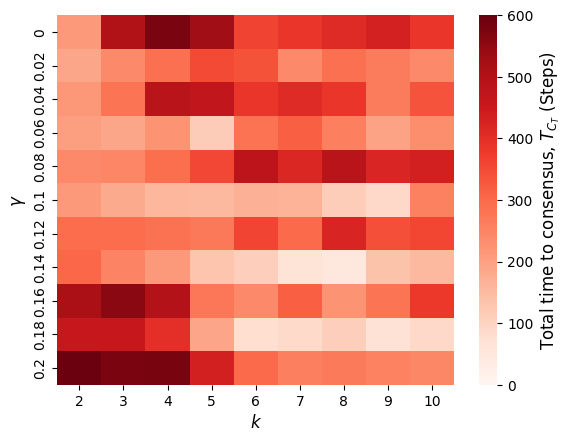

In [59]:
fig, ax = plt.subplots()

# s_range = [0,0.02,0.04,0.06,0.08,0.10]#,0.12,0.14,0.16,0.18,0.2]
# w_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# inv_range = [0,0.001,0.002,0.003,0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# w_range = [1,1.5,2,2.5,3,3.5,4,4.5,5]
# s_range = [0, 0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.20]


x_range = k_range
y_range = s_range

# y_range = s_range
# x_range = w_range

# data_mat
# N_range = [10,20,30,40,50,60,70,80,90,100]

# sns.heatmap(np.transpose(data_mat), vmin = 0, vmax = 400, cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Time to first consensus, $T_{C_1}$ (Steps)'})

# sns.heatmap(np.transpose(std_mat), cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Standard deviation (Steps)'})

# sns.heatmap(np.transpose(fail_mat/10), vmin = 0, vmax = 1, cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Failure rate'})

# sns.heatmap(np.transpose(data1_mat), vmin = 0, vmax = 600, cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Time to second consensus, $T_{C_2}$ (Steps)'})

# sns.heatmap(np.transpose(std1_mat), cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Standard deviation (Steps)'})

# sns.heatmap(np.transpose(fail1_mat) / 10, vmin = 0, vmax = 1, cmap = 'Reds', yticklabels = y_range,
#             xticklabels = x_range, cbar_kws={'label': 'Failure rate'})


sns.heatmap(np.transpose(data1_mat), vmin = 0, vmax = 600, cmap = 'Reds', yticklabels = y_range,
            xticklabels = x_range, 
            cbar_kws={'label': 'Total time to consensus, $T_{C_T}$ (Steps)'})

ax.figure.axes[-1].yaxis.label.set_size(12)

# # # data_mat
# # plt.ylabel('$w_{stubborn}$', fontsize = 12)
plt.xlabel(r'$k$', fontsize = 12)
plt.ylabel(r'$\gamma$', fontsize = 12)

# plt.savefig('PoolRateFigures/SProdOp/Dilution/Switching/Reconvergent/VaryingThetaandW/total.pdf', bbox_inches = 'tight')

In [98]:
data_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/Switching/Convergent/VaryingSandW/SW=5/time.csv', dtype = 'float', delimiter = ',')
data1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/Switching/Reconvergent/VaryingSandW/SW=5/time1.csv', dtype = 'float', delimiter = ',')
total_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/Switching/Reconvergent/VaryingSandW/SW=5/total.csv', dtype = 'float', delimiter = ',')

# data_mat = np.transpose(data_mat)[0:5]
# data1_mat = np.transpose(data1_mat)[0:5]
# total_mat = np.transpose(total_mat)[0:5]
# data_mat = data_mat[0:5]
# data1_mat = data1_mat[0:5]
# total_mat = total_mat[0:5]

In [440]:
iterations = 5
max_steps = 500

params = {"N": 50, "k": 3, "w": 2, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0.1, "logOp" : True, "stub_w" : 2}

results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

results_df = pd.DataFrame(results)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.22it/s]


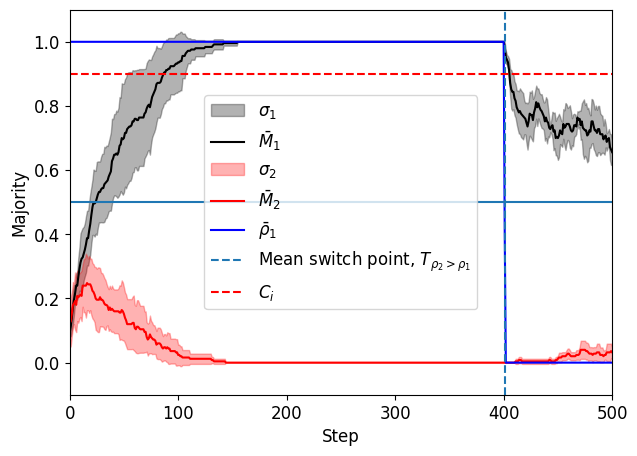

In [441]:
plot_average_majority(results_df, iterations, max_steps, figsize = [7,5], visit = True)
plt.legend(loc = 0, fontsize = 12)

plt.axhline(y=0.5)
# plt.ylabel('Average opinion / Option 1 quality')
# plt.savefig('PoolRateFigures/ProdOp/Switching/Reconvergent/VaryingSandSW/AverageOps/5K_0_04S_10SW.pdf' , bbox_inches = 'tight')

20.673873367126888


(0.0, 1.0)

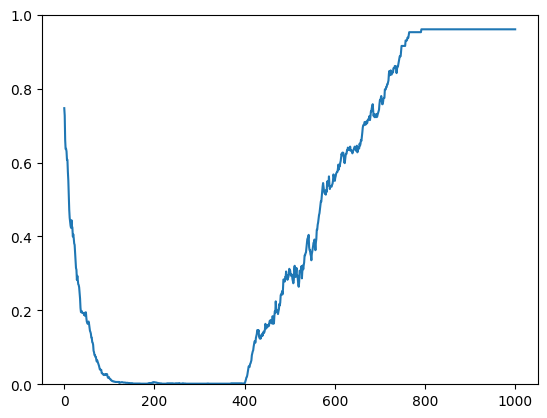

In [52]:
data = []

for it in range(iterations):
    
    results_it = results_df[results_df.iteration == it]
    results_it = results_it.drop_duplicates(subset = ['Step'] ,keep = 'first')
    data.append(results_it.MSE1)
    
data_mean = (np.mean(data, axis = 0))


print(sum(data_mean) ** (1/2))

plt.plot(results_it.Step, data_mean)

# data_mean
plt.ylim(0,1)

# data_mean
# data

<AxesSubplot: >

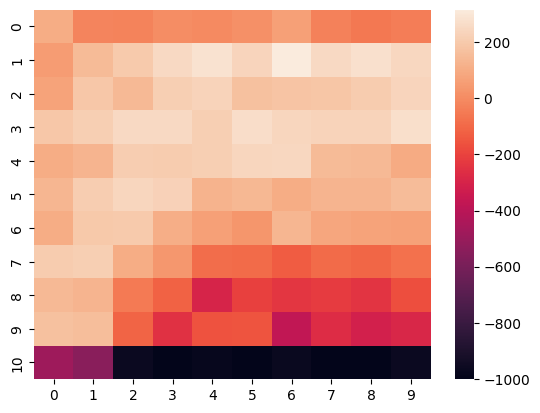

In [21]:
total_gain = np.loadtxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingSandSWAMP/totalgain.csv',dtype = 'float', delimiter = ',')
data1 = np.loadtxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingSandSWAMP/time1.csv',dtype = 'float', delimiter = ',')
data = np.loadtxt('PoolRateMats/ProdOp/Switching/Convergent/VaryingSandSWAMP/time.csv',dtype = 'float', delimiter = ',')

sns.heatmap(total_gain)

In [22]:
data1_adjusted = data1 * 4/6
total_adjusted = data1 + data

data_mat = data
data1_mat = data1_adjusted
total_mat = total_adjusted

In [120]:
def return_MSE(results_df, iterations, max_step, dynamic = True):

    majors = []
    minors = []
    switch_points = []

    for it in range(iterations):
        results_it = results_df[results_df.iteration == it]
        results_it = results_it.drop_duplicates(subset = ['Step'] ,keep = 'first')
        majors.append(results_it.MSE1)
        minors.append(results_it.MSE2)
        switch_point = results_it[results_it['Option 1 quality'] < 0.5].Step.values[0]
        switch_points.append(switch_point)
            
    major_mean = np.mean(majors,axis=0)
    minor_mean = np.mean(minors,axis=0) 
    mean_switch = np.mean(switch_points)
    
    print(mean_switch)
    
    if dynamic == False:
        return sum(major_mean) ** (1/2)
        
    else:        
        return (sum(major_mean[0:int(mean_switch - 1)])  + sum(minor_mean[int(mean_switch):])) ** (1/2)

## Making heatmaps and gain maps for the visit-dependent case

In [5]:
# data_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingSandW/time.csv', dtype = 'float', delimiter = ',')
# std_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingSandW/std.csv', dtype = 'float', delimiter = ',')
# fail_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Convergent/VaryingSandW/fail.csv', dtype = 'float', delimiter = ',')

# data1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingSandW/time1.csv', dtype = 'float', delimiter = ',')
# std1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingSandW/std1.csv', dtype = 'float', delimiter = ',')
# fail1_mat = np.loadtxt('PoolRateMats/SProdOp/Dilution/TimeDynamic/Reconvergent/VaryingSandW/fail1.csv', dtype = 'float', delimiter = ',')
# # total_mat = np.loadtxt('PoolRateMats/ProdOp/VisitDynamic2/Reconvergent/VaryingThetaandK/total.csv', dtype = 'float', delimiter = ',')

data1_mat_adj = data1_mat * (500 / (1000 - 400))
data_mat_adj = data_mat * (500 / 400 )

total_mat = data_mat_adj + data1_mat_adj
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/total_new.csv', total_mat, delimiter = ',')

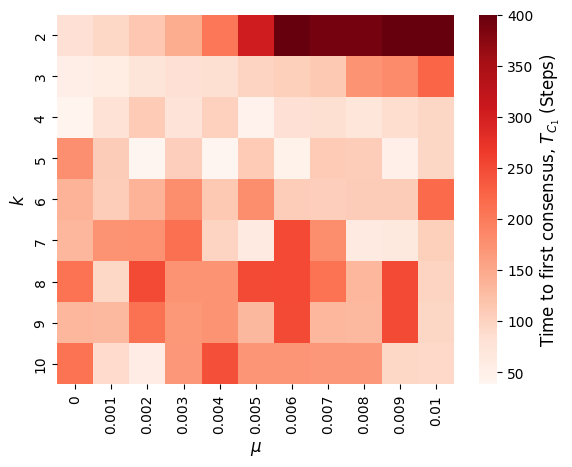

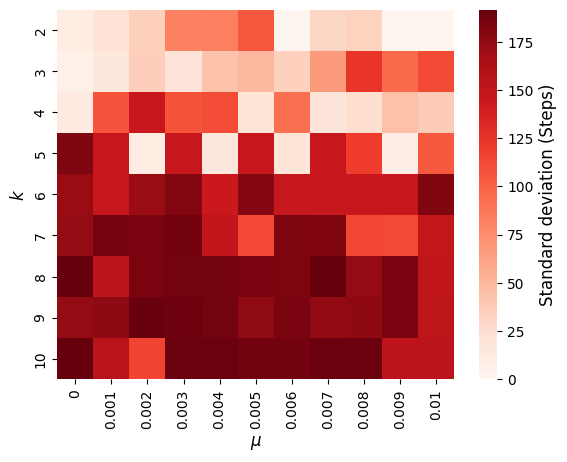

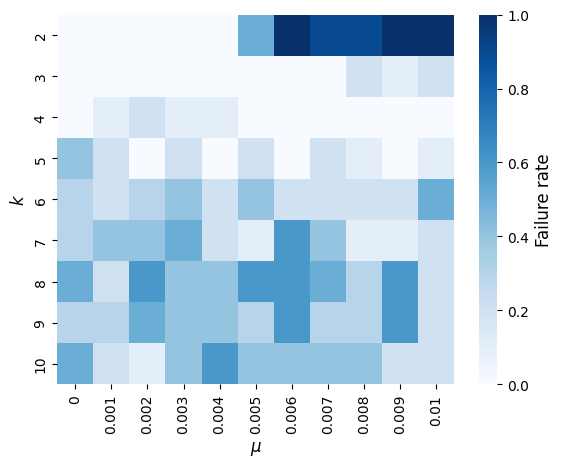

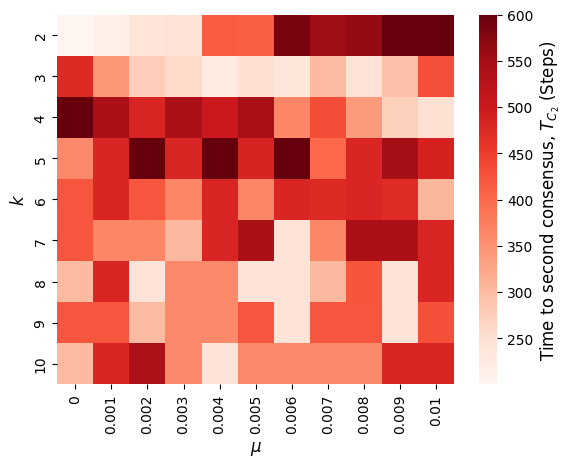

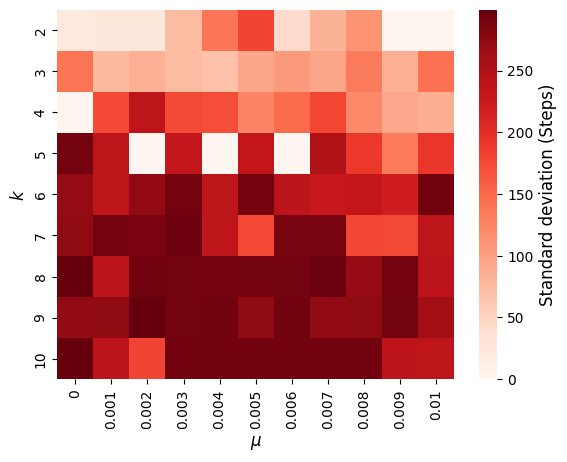

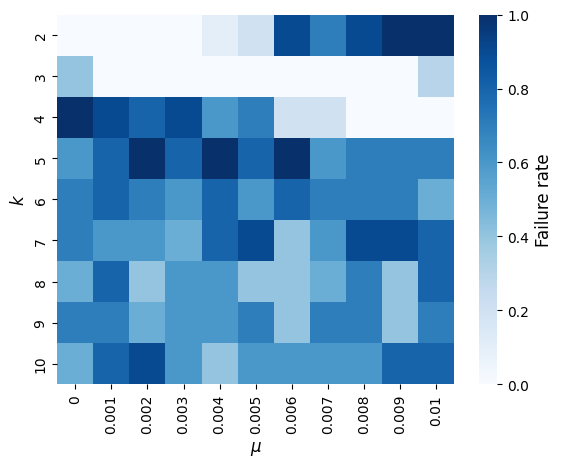

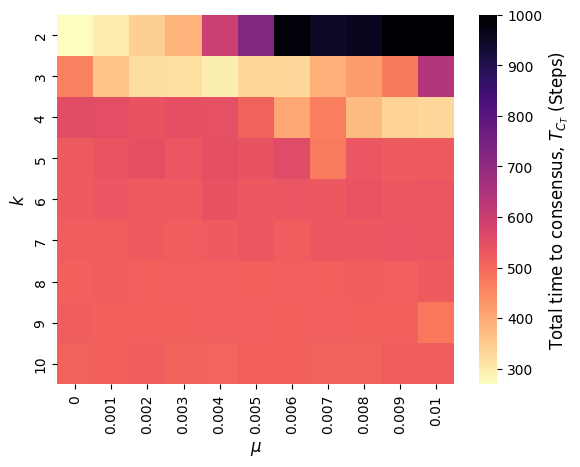

In [9]:
theta_range = [0,0.004,0.008,0.012,0.016,0.02,0.024,0.028,0.032,0.036,0.040]
s_range = [0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2]
ws_range = [1,2,3,4,5,6,7,8,9,10]
k_range =  [2,3,4,5,6,7,8,9,10]
mu_range = [0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]
w_range = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

y_range = k_range
x_range = mu_range

x_label = r'$\mu$'
y_label = r'$k$'

dynamic = 'Switching'

data_mat = np.transpose(data_mat)
data1_mat = np.transpose(data1_mat)
std_mat = np.transpose(std_mat)
std1_mat = np.transpose(std1_mat)
fail_mat = np.transpose(fail_mat)
fail1_mat = np.transpose(fail1_mat)
total_mat = np.transpose(total_mat)


fig, ax = plt.subplots()
sns.heatmap(data_mat,  cmap = 'Reds', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Time to first consensus, $T_{C_1}$ (Steps)'})
name = 'time'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Convergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')


fig, ax = plt.subplots()
sns.heatmap(std_mat, cmap = 'Reds', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Standard deviation (Steps)'})
name = 'std'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Convergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')

fig, ax = plt.subplots()
sns.heatmap(fail_mat/10, vmin = 0, vmax = 1, cmap = 'Blues', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Failure rate'})
name = 'fail'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Convergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')


fig, ax = plt.subplots()
sns.heatmap(data1_mat, cmap = 'Reds', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Time to second consensus, $T_{C_2}$ (Steps)'})
name = 'time1'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Reconvergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')

fig, ax = plt.subplots()
sns.heatmap(std1_mat, cmap = 'Reds', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Standard deviation (Steps)'})
name = 'std1'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Reconvergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')

fig, ax = plt.subplots()
sns.heatmap(fail1_mat / 10, vmin = 0, vmax = 1, cmap = 'Blues', yticklabels = y_range,
            xticklabels = x_range, cbar_kws={'label': 'Failure rate'})
name = 'fail1'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Reconvergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')


fig, ax = plt.subplots()
sns.heatmap(total_mat, yticklabels = y_range, cmap = "magma_r",
            xticklabels = x_range, 
            cbar_kws={'label': 'Total time to consensus, $T_{C_T}$ (Steps)'})
name = 'total'
ax.figure.axes[-1].yaxis.label.set_size(12)
plt.xlabel(x_label, fontsize = 12)
plt.ylabel(y_label, fontsize = 12)
plt.savefig('PoolRateFigures/ProdOp/' +dynamic +'/Reconvergent/VaryingMUandK/new' + name + '.pdf', bbox_inches = 'tight')


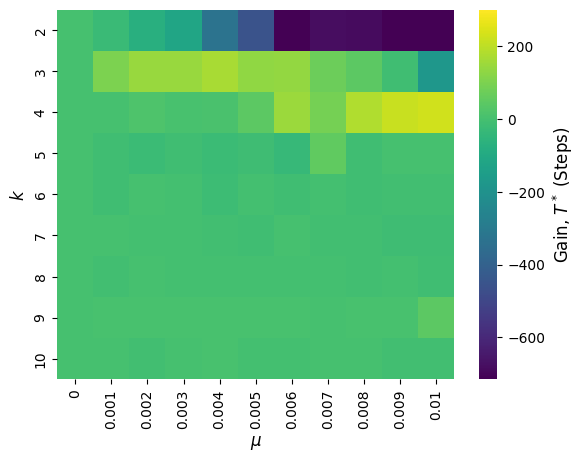

In [25]:
# Gains

copy = np.empty(data_mat_adj.shape)
copy1 = np.empty(data1_mat_adj.shape)
copy2 = np.empty(total_mat.shape)

gain = np.empty(data_mat_adj.shape)
gain1 = np.empty(data1_mat_adj.shape)
gain2 = np.empty(total_mat.shape)

# For this case, it might actually be alright
# row = np.repeat(np.mean(data_mat_adj[:,0]), copy.shape[0])
# row1 = np.repeat(np.mean(data1_mat_adj[:,0]), copy.shape[0])
# row2 = np.repeat(np.mean(total_mat[:,0]), copy.shape[0])


# row = np.repeat(np.mean(data_mat_adj[0]), copy.shape[1])
# row1 = np.repeat(np.mean(data1_mat_adj[0]), copy.shape[1])
# row2 = np.repeat(np.mean(total_mat[0]), copy.shape[1])


row = data_mat_adj[:,0]
row1 = data1_mat_adj[:,0]
row2 = total_mat[:,0]

for i in range(copy.shape[1]):
    copy[:,i] = row
    copy1[:,i] = row1
    copy2[:,i] = row2

gain = copy - data_mat_adj
gain1 = copy1 - data1_mat_adj
gain2 = copy2 - total_mat

np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/newgain.csv', gain, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/newgain1.csv', gain1, delimiter = ',')
np.savetxt('PoolRateMats/ProdOp/Switching/Reconvergent/VaryingMUandK/newtotalgain.csv', gain2, delimiter = ',')

fig, ax = plt.subplots()

# y_range = [2,3,4,5,6]
# x_range = [0,0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2]

# x_range = [0,0.02,0.04,0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.20]
# y_range = [1,2,3,4,5,6,7,8,9,10]

k_range = [2,3,4,5,6]

# y_range = s_range
# x_range = w_range

sns.heatmap(gain2, cmap = 'viridis', vmax = 300, vmin = -715,
#             cmap = sns.color_palette("vlag", as_cmap=True), 
            yticklabels = y_range, xticklabels = x_range,
           cbar_kws = {'label' : 'Gain, $T^*$ (Steps)'})

ax.figure.axes[-1].yaxis.label.set_size(12)

# plt.xlabel('$w$', fontsize = 12)
plt.ylabel(r'$k$', fontsize = 12)
plt.xlabel(r'$\mu$', fontsize = 12)

plt.savefig('PoolRateFigures/ProdOp/Switching/Reconvergent/VaryingMUandK/newtotalgain.pdf', bbox_inches = 'tight')

In [22]:
gain1.max()

291.91666666666663

In [56]:
def return_consensus_array(results_df, params, iterations, max_steps):
    
    data = []
    data1 = []

    for it in range(iterations):

        results_it = results_df[(results_df.iteration == it) & (results_df.Majority >= 0.9)]

        if len(results_it) > 0:
            consensus_time = results_it.Step.values[0]

        else:
            consensus_time = params['dynamic_point'] ## from start to dynamic point

        # AND NOW TO INCLUDE THE SECOND TIME TO CONSENSUS

        results_it1 = results_df[(results_df.iteration == it) & (results_df.Dynamic_Majority >= 0.9)
                                 & (results_df.Step > params['dynamic_point'])]

        if len(results_it1) > 0:
            consensus_time1 = results_it1.Step.values[0] - params["dynamic_point"]

        else:
            consensus_time1 = max_steps - params["dynamic_point"]

        data.append(consensus_time)
        data1.append(consensus_time1)
        
        
        
    total = []
    for i in range(len(data)):
        total.append(data1[i] * (500 / (1000 - 400)) + data[i] * (500 / 400))
        
#         data = [i * (500 / (1000 - 400)) for i in data]
#         data1 = [ i * (500 / 400 ) for i in data1]

#         total = []
#         for i in len(data):
#             total[i] = data[i] + data1[j]
                
            
    return total

In [79]:
# Time to make some boxplots
iterations = 10
max_steps = 1000

params = {"N": 50, "k": 3, "w": 1, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : False, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "time_dynamic",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0.1, "logOp" : True, "stub_w" : 2}

results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)

results_df = pd.DataFrame(results)

values1 = return_consensus_array(results_df, params, iterations, max_steps)

params = {"N": 50, "k": 3, "w": 1, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "stubborn", "dynamic_point" : 400, "s_proportion" : 0.04, "logOp" : False, "stub_w" : 1}

results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)
results_df = pd.DataFrame(results)

values2 = return_consensus_array(results_df, params, iterations, max_steps) 

params = {"N": 50, "k": 3, "w": 1, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "stubborn", "dynamic_point" : 400, "s_proportion" : 0.06, "logOp" : True, "stub_w" : 3}

results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)
results_df = pd.DataFrame(results)

values3 = return_consensus_array(results_df, params, iterations, max_steps) 

params = {"N": 50, "k": 3, "w": 1, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0.005,
              "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
              "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0, "logOp" : False, "stub_w" : 1}

results = mesa.batch_run(Model, parameters=params, number_processes=1,
                                 data_collection_period=1,display_progress=True,
                iterations = iterations, max_steps=max_steps)
results_df = pd.DataFrame(results)

values4 = return_consensus_array(results_df, params, iterations, max_steps) 

# params = {"N": 50, "k": 3, "w": 1, "alpha": 0.05, "epsilon" : 0.02, "inversion_rate" : 0,
#               "pooling" : True, "pool_rate" : 0.015,  "uniform" : False, "dynamics" : "switching",
#               "measures" : "none", "dynamic_point" : 400, "s_proportion" : 0.04, "logOp" : True, "stub_w" : 2}

# results = mesa.batch_run(Model, parameters=params, number_processes=1,
#                                  data_collection_period=1,display_progress=True,
#                 iterations = iterations, max_steps=max_steps)
# results_df = pd.DataFrame(results)

# values5 = return_consensus_array(results_df, params, iterations, max_steps) 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.65s/it]


In [82]:
# sns.boxplot(data1, x="age", y="class")
df = pd.DataFrame(columns = ['Name', 'value'])
df.loc[:,'value'] = pd.Series(values1)
df.loc[:,'Name'] = 'No pooling'

df2 = pd.DataFrame(columns = ['Name', 'value'])
df2.loc[:,'value'] = pd.Series(values2)
df2.loc[:,'Name'] = 'Stubborn'

df3 = pd.DataFrame(columns = ['Name', 'value'])
df3.loc[:,'value'] = pd.Series(values3)
df3.loc[:,'Name'] = 'Super-stubborn'

df4 = pd.DataFrame(columns = ['Name', 'value'])
df4.loc[:,'value'] = pd.Series(values4)
df4.loc[:,'Name'] = 'Inversion'

df = pd.concat([df, df2, df3, df4])
df

,Name,value
0,No pooling,485.000000
1,No pooling,414.583333
2,No pooling,453.750000
3,No pooling,473.333333
4,No pooling,405.000000
5,No pooling,423.333333
6,No pooling,493.750000
7,No pooling,425.416667
8,No pooling,415.833333
9,No pooling,426.666667


<AxesSubplot: xlabel='Name', ylabel='value'>

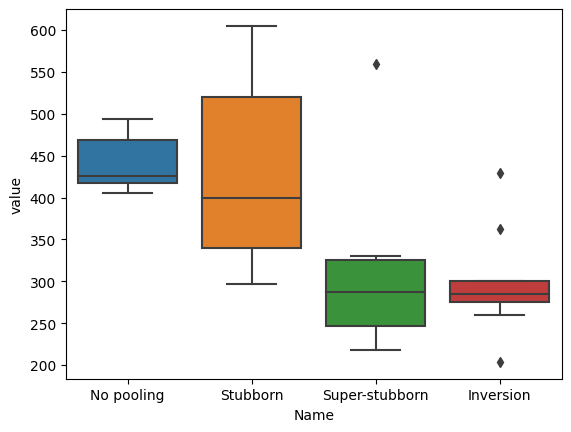

In [81]:
sns.boxplot(df, y = "value", x = "Name", orient = 'v')

In [44]:
values1

[147.5]